<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PR-AUC" data-toc-modified-id="PR-AUC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PR AUC</a></span></li></ul></div>

# AUC

- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- http://www.chioka.in/differences-between-roc-auc-and-pr-auc/

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score,roc_curve

In [2]:
# 30 examples 
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1]
y_pred = np.arange(0, 1.0, 1/30)

In [3]:
print(roc_auc_score(y, y_pred))
print(average_precision_score(y, y_pred))

0.9521531100478469
0.92814861905771


In [4]:
fpr, tpr, threshold = roc_curve(y,y_pred)

In [41]:
t = pd.DataFrame(np.concatenate((fpr.reshape(-1,1), tpr.reshape(-1,1), threshold.reshape(-1,1)),axis=1),columns=['fpr','tpr','threshold'])
t

,fpr,tpr,threshold
0,0.000000,0.090909,0.966667
1,0.000000,0.636364,0.766667
2,0.052632,0.636364,0.733333
3,0.052632,0.727273,0.700000
4,0.105263,0.727273,0.666667
5,0.105263,0.818182,0.633333
6,0.157895,0.818182,0.600000
7,0.157895,0.909091,0.566667
8,0.210526,0.909091,0.533333
9,0.210526,1.000000,0.500000


In [43]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9521531100478469

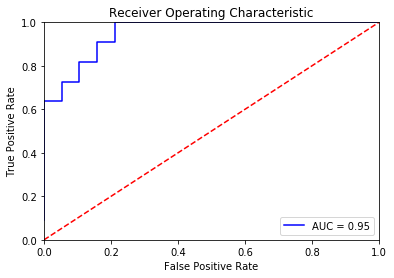

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## PR AUC

http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

Text(0.5,1,'2-class Precision-Recall curve: AP=0.93')

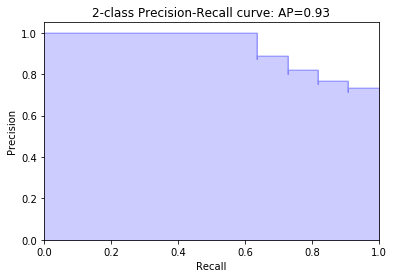

In [7]:
average_precision = average_precision_score(y, y_pred)

precision, recall, _ = precision_recall_curve(y, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))